# Classes Word et nltk
#### Jouons un peu avec un fichier taggé et nltk
Un peu de POO avec nos propres classes puis celles de nltk

## Classes Word pour lecture de fichiers taggés en pos

In [1]:
import re

class Word:
    """ Classe Word : définit un mot simple de la langue """

    type = "simple"

    def __init__(self, *args):
            self.form, self.lemma, self.pos = args

    def is_inflected(self):
        if self.form != self.lemma:
            return True
        else:
            return False

    def magic_compare(self, other_word):
        diff = []
        for key in self.__dict__.keys():
            if self.__dict__[key] != other_word.__dict__[key]:
                diff.append(key)
        return diff

    def __str__(self):
        return " ".join((self.form, self.lemma, self.pos))


`__str__` est une méthode que partagent tous les objets, elle est appellée par la fonction `print`.
Ici nous 'surchargeons' la méthode pour spécifier la sortie désirée. On peut aussi implémenter une ou plus méthodes d'output (text, xml, json, ...)

In [2]:
obj = Word("été", "été", "NOM")
print(obj)

été été NOM


Pour les imports de données aux formats TreeTagger, Brow et Sem nous allons utiliser des classes qui héritent de Word.
Les classes se contentent d'avoir un constructeur différent.

In [3]:
class WordTreeTagger(Word):
    def __init__(self, formatted_str):
        """
        import a formatted_str in treetagger format
        """
        self.form, self.lemma, self.pos = formatted_str.split("\t")

class WordBrown(Word):
    def __init__(self, formatted_str):
        """
        import a formatted_str in brown format
        """
        self.form, self.lemma, self.pos = formatted_str.split("/")

class WordSem(Word):
    def __init__(self, formatted_str):
        """
        import a formatted_str in sem format (brown with no lemmas
        """
        self.form, self.pos = formatted_str.split("/")
        self.lemma = ""

Un objet WordBrown est aussi un objet Word

In [4]:
obj_brown = WordBrown("été/être/V")
if isinstance(obj_brown, WordBrown):
    print("Évidemment obj_brown est une instance de WordBrown")
if isinstance(obj_brown, Word):
    print("C'est aussi une instance de la classe Word, je peux lui appliquer les méthodes de Word")
obj_brown.magic_compare(obj)

Évidemment obj_brown est une instance de WordBrown
C'est aussi une instance de la classe Word, je peux lui appliquer les méthodes de Word


['pos', 'lemma']

Lecture et chargement du fichier `lecun-pos.txt`, transcription tagguée avec Sem (http://apps.lattice.cnrs.fr/sem) d'une présentation de l'intelligence artificielle de Yann LeCun au collège de France (https://www.college-de-france.fr/site/yann-lecun/Recherches-sur-l-intelligence-artificielle.htm).

In [5]:
words = []
with open('lecun-pos.txt') as file:
    for line in file:
        if '/' in line:
            line = line.rstrip()
            words.extend([WordSem(item) for item in line.split(" ")])

In [6]:
for word in words[:10]:
    print(word)

Qu’_est-ce_que  CS
l’  DET
intelligence  NC
artificielle  ADJ
?  PONCT
Qu’_est-ce_que  CS
l’  DET
intelligence  NC
?  PONCT
Est-ce  NPP


Le fichier est chargé en mémoire dans une liste d'objets Word.
Je voudrais maintenant faire des calculs simples sur les fréquences de mots, trouver les hapax, les mots d'une certaine catégorie, etc...
Je peux faire ça à la main sans trop de difficultés, je peux aussi utiliser le package `nltk` et plus particulièrement le module `nltk.probablity`

## Utilisation du module `nltk.probability`

In [7]:
from nltk.probability import FreqDist, ConditionalFreqDist

Si vous avez un message d'erreur c'est que le package `nltk` n'est pas installé sur votre machine : `sudo pip3 install nltk`

Nous aurons aussi besoin de matplotlib. Si vous êtes sur une debian-based utilisez apt-get pour l'installer (`python3-matplotlib`), sinon pip.

Il faut commencer par lire ou au moins parcourir la [doc de `nltk.probability`](http://www.nltk.org/api/nltk.html?highlight=nltk.probability#module-nltk.probability)
Nous allons utiliser les classes `FreqDist` et `ConditionalFreqDist`

In [8]:
fdist = FreqDist(word.form.lower() for word in words)
fdist.hapaxes()

['nous_même',
 'précédente',
 'éclatant',
 'à_même',
 'ajuste',
 'consistait',
 'essais',
 'à_des',
 'endroits',
 'robot',
 'esprit',
 'évolution',
 'conduite',
 'dès',
 'gadget',
 'vies',
 'gagnant',
 'tâche',
 'je',
 'dirigeantes',
 'ignorant',
 'dépasse',
 'sort',
 '95',
 'infiniment',
 'combineront',
 'du_jour_au_lendemain',
 'utilise',
 'besoin',
 'locuteur',
 'œuvre',
 'fonctionnel',
 'conspiration',
 'nouveaux',
 'neural',
 'véritable',
 'arborescente',
 'abstraits',
 'physiques',
 'intéressantes',
 'indique',
 'couche',
 'apparition',
 'bonne',
 'existe',
 'importance',
 'répondre',
 'initiative',
 'entraîne',
 'qualificatif',
 'inconnue',
 'simulés',
 'smartphone',
 'visuel',
 'préférées',
 'reçoit',
 'logistique',
 'médecine',
 'connaissances',
 'équipe',
 'france',
 '1996',
 'prestigieux',
 'stratégique',
 'extractor',
 'sentiments',
 'recherches',
 'processeurs',
 'en_même_temps',
 'probablement',
 'ajustable',
 'symptôme',
 'pixel',
 'labo',
 'investir',
 'actions',
 'malh

Et voilà. C'est aussi simple que ça de trouver les hapax.
À vous de jouer, trouvez le mot le plus fréquent, puis les 20 mots les plus fréquents, trouvez les fréquences de 'le', 'artificielle' et 'réseaux'.

Enfin affichez un graphe des fréquences des 20 mots les plus fréquents.

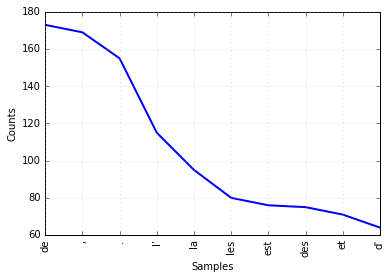

In [12]:
#fdist.max()
#for form, occ in fdist.most_common(20):
#    print(form)
#fdist['le']
%matplotlib inline
fdist.plot(10)


`ConditionalFreqDist` permet de faire des calculs de fréquences selon une certaine condition. Ici nous allons utiliser le pos comme condition.

# cfdist = ConditionalFreqDist((word.pos, word.form) for word in words)

In [11]:
cfdist['V']

FreqDist({'Faut': 1,
          'a': 14,
          'ai': 1,
          'ajuste': 1,
          'anime': 1,
          'appelle': 4,
          'apprenons': 1,
          'arrivons': 1,
          'assiste': 1,
          'associe': 1,
          'augmentera': 1,
          'aurons': 1,
          'auront': 2,
          'avons': 4,
          'bat': 1,
          'calcule': 1,
          'chargera': 1,
          'combineront': 1,
          'comment': 1,
          'conduisent': 1,
          'consistait': 1,
          'correctement': 1,
          'demande': 1,
          'devient': 1,
          'devrons': 1,
          'diminuera': 1,
          'doit': 1,
          'donne': 2,
          'dépasse': 1,
          'désigne': 1,
          'désirons': 1,
          'détectent': 1,
          'd’': 8,
          'entourent': 1,
          'entraîne': 1,
          'est': 76,
          'existe': 1,
          'explicitement': 1,
          'extrairont': 1,
          'exécute': 1,
          'faisons': 1,
          'fait

On obtient très facilement la liste des mots étiquetés comme verbes et leur fréquence.